# Scaling

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Transform numerical data into same range (typically small). Some method may work best with scaling
ex. KNN, Neural Network, Linear Model
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [2]:
tips = sns.load_dataset('tips')

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

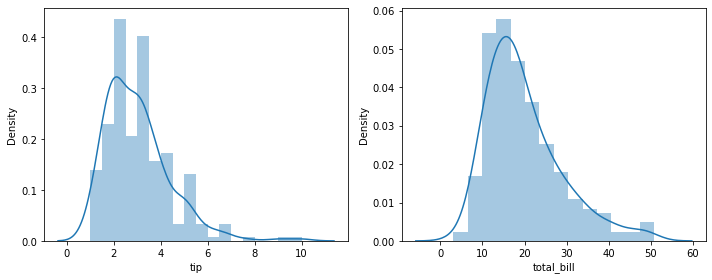

In [3]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()

In [4]:
tips['tip total_bill'.split()].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
X = tips['tip total_bill'.split()]

In [7]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

>## MinMax
Transform each variable to Range 0 - 1
\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}


In [8]:
minmax.fit(X)
# behind the scene
# minmax_tip = (x_i - 1) / (10 - 1)
# minmax_total_bill = (x_i - 3.07) / (50.81 - 3.07)

X_minmax = pd.DataFrame(minmax.transform(X), columns=X.columns)
display(X[X['tip'] == X['tip'].max()])
display(X_minmax[X_minmax['tip'] == X_minmax['tip'].max()])

,tip,total_bill
170,10.0,50.81


,tip,total_bill
170,1.0,1.0


In [9]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

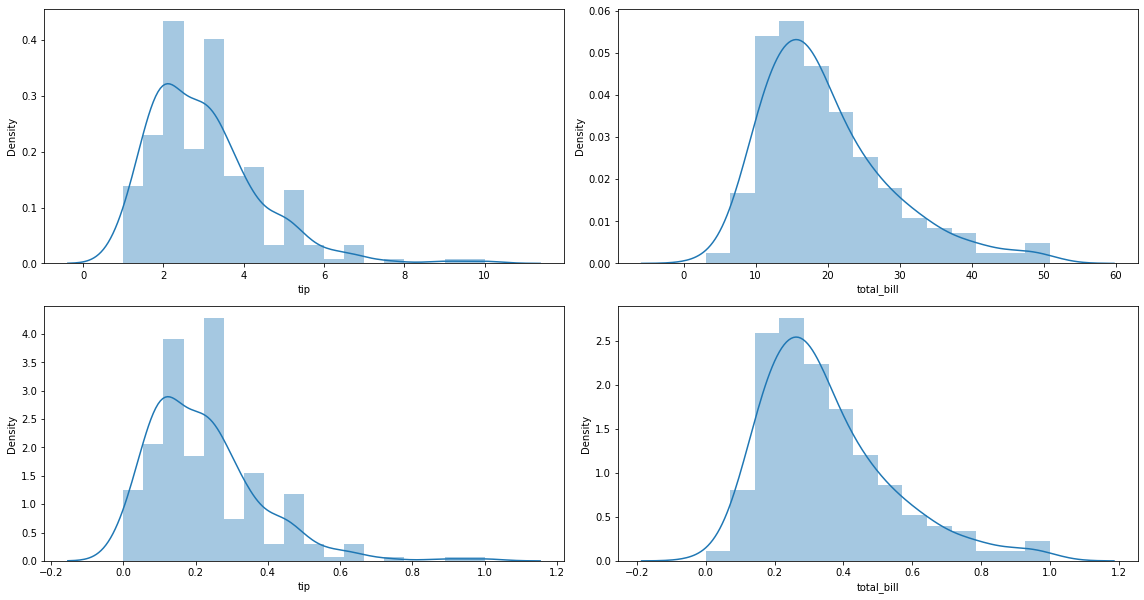

In [10]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(tips['tip'])
plt.subplot(2,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()


plt.subplot(2,2,3)
sns.distplot(X_minmax['tip'])
plt.subplot(2,2,4)
sns.distplot(X_minmax['total_bill'])
plt.show()

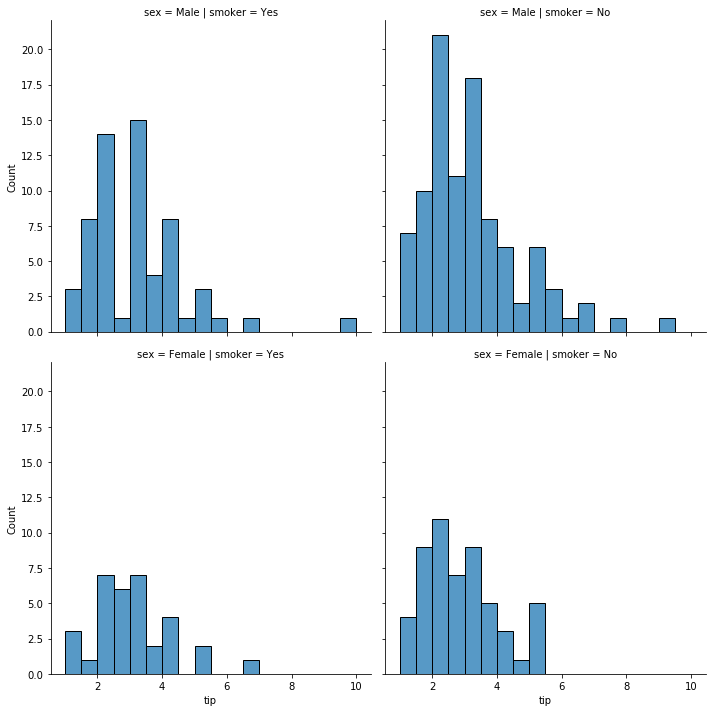

In [11]:
sns.displot(data=tips, x='tip', col='smoker', row='sex')
plt.show()

>## Standard Scaler
Transform each variabels to : mean = 0 stdev = 1
\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}

In [12]:
X_standard = standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=['tip', 'total_bill'])
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

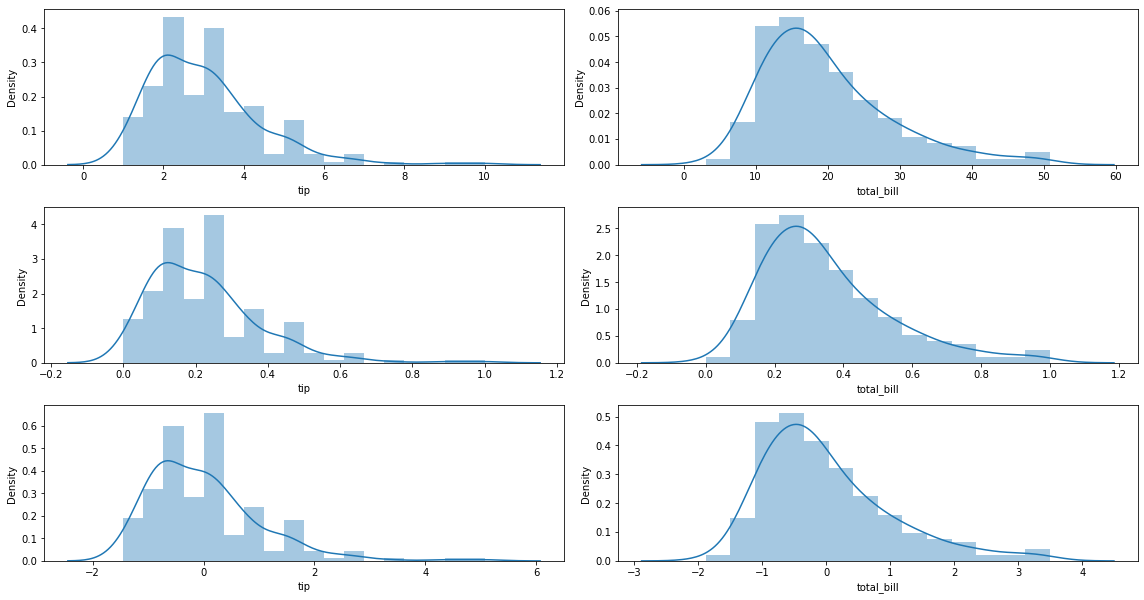

In [13]:
plt.figure(figsize = (16,8))

plt.subplot(3,2,1)
sns.distplot(tips['tip'])
plt.subplot(3,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()


plt.subplot(3,2,3)
sns.distplot(X_minmax['tip'])
plt.subplot(3,2,4)
sns.distplot(X_minmax['total_bill'])
plt.subplot(3,2,5)
sns.distplot(X_standard['tip'])
plt.subplot(3,2,6)
sns.distplot(X_standard['total_bill'])
plt.show()

In [14]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.839259e-16,-7.871663e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


from illustration above, you can see that standard scaler method has transformed each varables into mean = 0 and std = 1.

> ## RobustScaler

Transform each variabel into small range
\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}


In [15]:
X_robust = robust.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns=['tip','total_bill'])
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [16]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

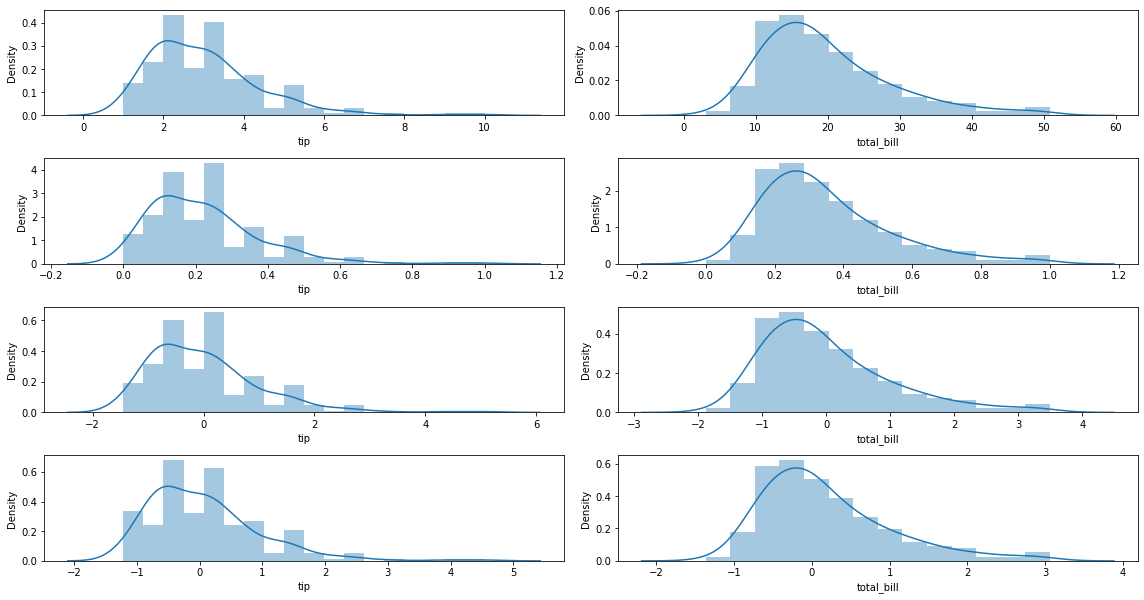

In [17]:
plt.figure(figsize = (16,8))

plt.subplot(4,2,1)
sns.distplot(tips['tip'])
plt.subplot(4,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()


plt.subplot(4,2,3)
sns.distplot(X_minmax['tip'])
plt.subplot(4,2,4)
sns.distplot(X_minmax['total_bill'])

plt.subplot(4,2,5)
sns.distplot(X_standard['tip'])
plt.subplot(4,2,6)
sns.distplot(X_standard['total_bill'])

plt.subplot(4,2,7)
sns.distplot(X_robust['tip'])
plt.subplot(4,2,8)
sns.distplot(X_robust['total_bill'])
plt.show()

# Encoding
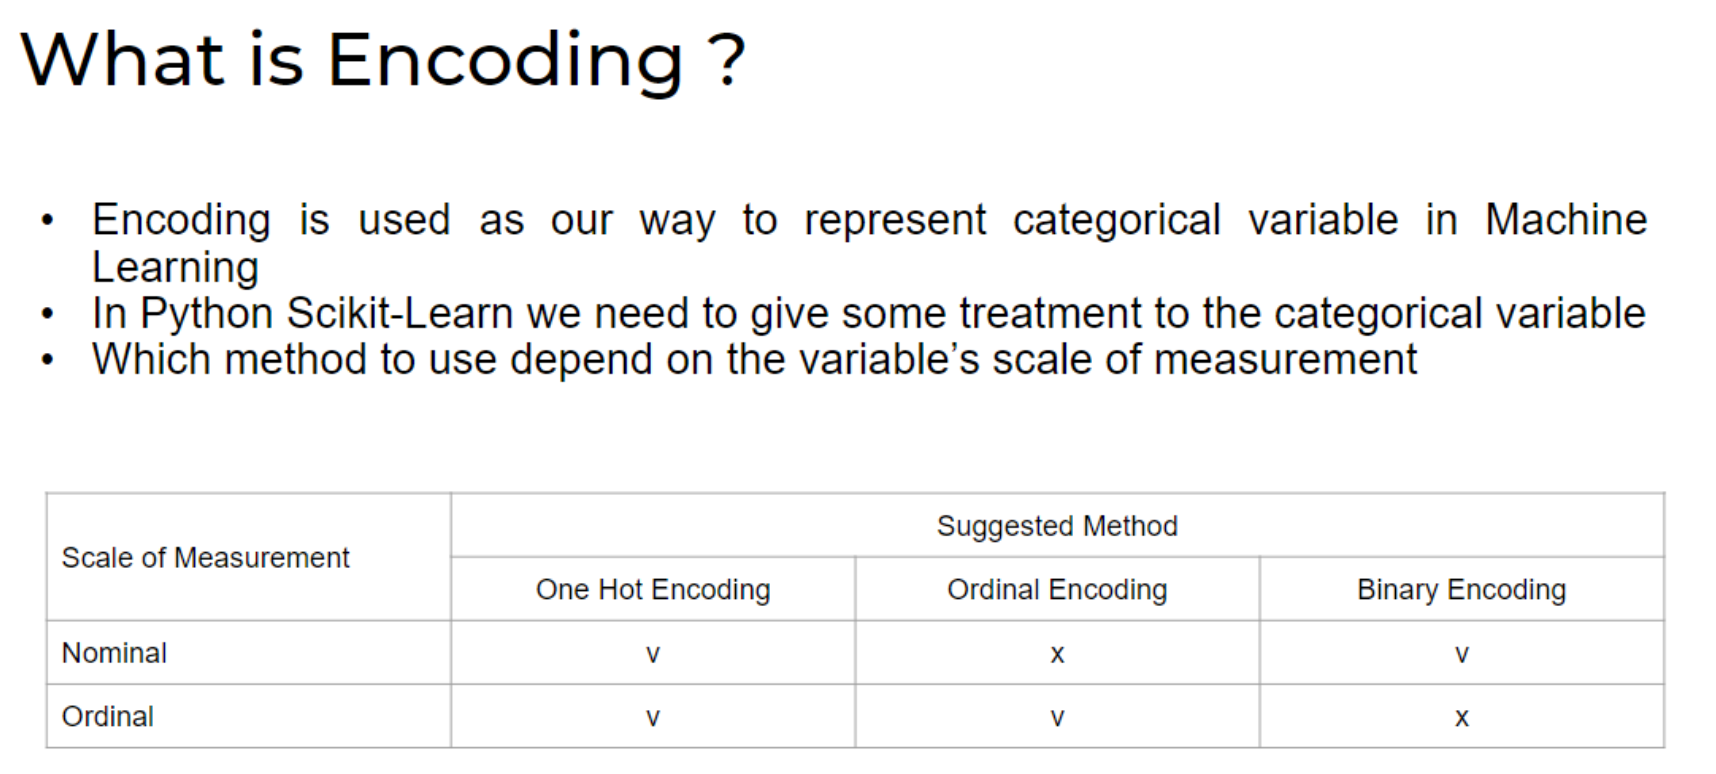

>## Pandas Get Dummies
One Hot Encoding using pd.get_dummies

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips.select_dtypes(include='category').describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [20]:
tips.select_dtypes(exclude='category').describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [21]:
tips_dummy = pd.get_dummies(tips, columns=tips.select_dtypes(include='category').columns)
tips_dummy

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [22]:
tips_dummy_k1 = pd.get_dummies(tips, columns=tips.select_dtypes(include='category').columns, drop_first=True)
tips_dummy_k1

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


>## Sklearn OneHotEncoder
One Hot Encoding also can be implemented using sklearn library. we use OneHotEncoder and ColumnTransformer classes. OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

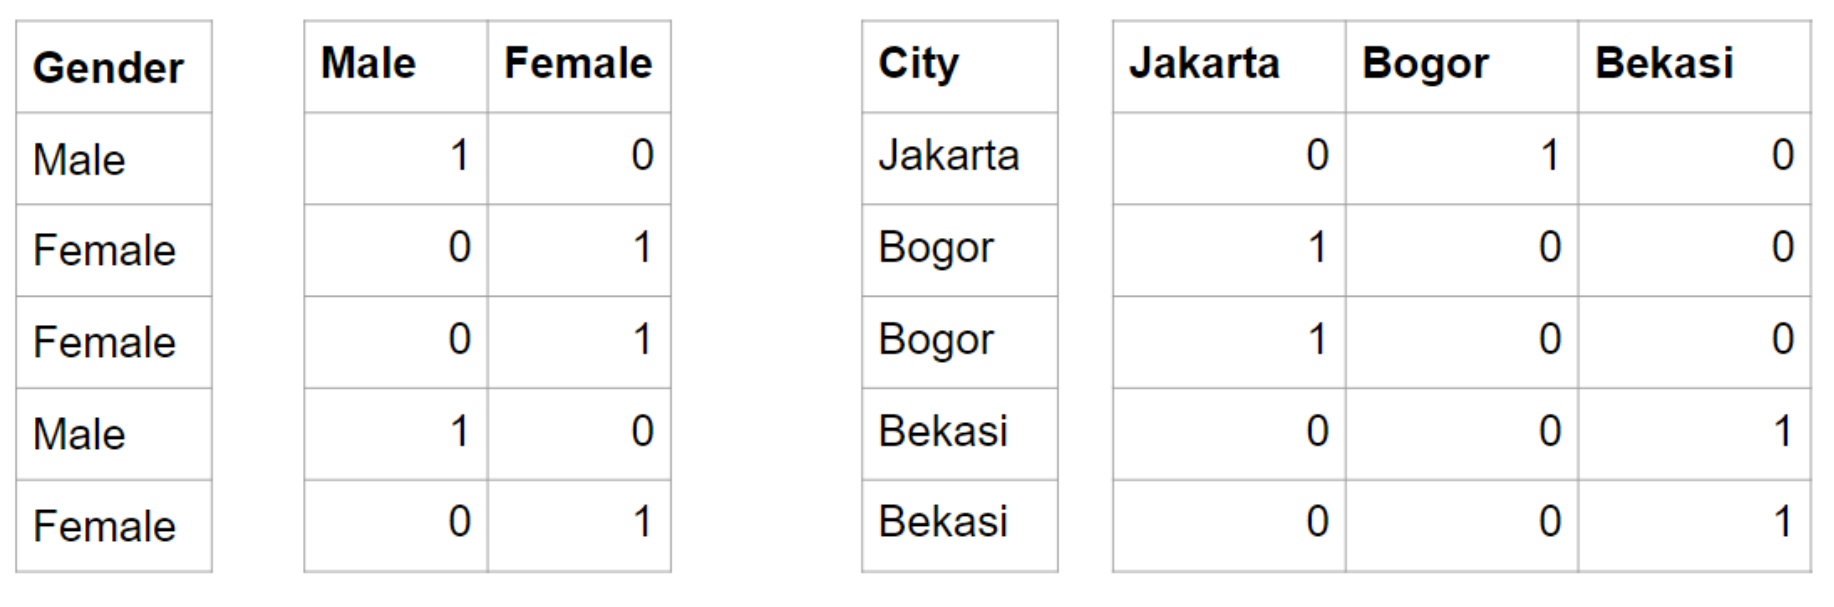

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), ['sex', 'smoker', 'day', 'time'])
])

In [25]:
tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded = tips_encoded.astype(int)
tips_encoded

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,0,1,0,0,1,0
240,1,0,0,1,0,1,0,0,1,0
241,0,1,0,1,0,1,0,0,1,0
242,0,1,1,0,0,1,0,0,1,0


Using this method you don't automatically rename the variables. You must get the name of the feature separately. But, in the later course you will find out that preprocessing method from skelarn can make your whole process of the modeling easier for: cross validation and hyperparameter tuning.

In [26]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [27]:
tips_encoded.columns = transformer.get_feature_names()
tips_encoded

,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,0,1,0,0,1,0
240,1,0,0,1,0,1,0,0,1,0
241,0,1,0,1,0,1,0,0,1,0
242,0,1,1,0,0,1,0,0,1,0


In [28]:
tips_encoded_sklearn =  pd.concat([tips[['total_bill', 'tip', 'size']], tips_encoded], axis=1)
tips_encoded_sklearn

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [29]:
transformer2 = ColumnTransformer([
    ('encoder', OneHotEncoder(), ['sex', 'smoker', 'day', 'time']),
    ('scaler', StandardScaler(), ['total_bill', 'tip', 'size'])
])

In [30]:
transformer2.fit_transform(tips)

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -3.14711305e-01, -1.43994695e+00, -6.00192629e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -1.06323531e+00, -9.69205340e-01,  4.53382921e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.37779900e-01,  3.63355539e-01,  4.53382921e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         3.24629502e-01, -7.22971264e-01, -6.00192629e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -2.21286504e-01, -9.04025732e-01, -6.00192629e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -1.13228903e-01,  1.24660453e-03, -6.00192629e-01]])

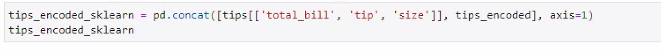

In [31]:
tips_encoded_transformer2 = pd.DataFrame(transformer2.fit_transform(tips))
tips_encoded_transformer2 = tips_encoded.astype(int)
tips_encoded_transformer2

,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,0,1,0,0,1,0
240,1,0,0,1,0,1,0,0,1,0
241,0,1,0,1,0,1,0,0,1,0
242,0,1,1,0,0,1,0,0,1,0


In [32]:
tips_encoded_sklearn2 =  pd.concat([tips[['total_bill', 'tip', 'size']], tips_encoded_transformer2], axis=1)
tips_encoded_sklearn2

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [33]:
transformer2.named_transformers_['encoder'].get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_Fri', 'x2_Sat',
       'x2_Sun', 'x2_Thur', 'x3_Dinner', 'x3_Lunch'], dtype=object)

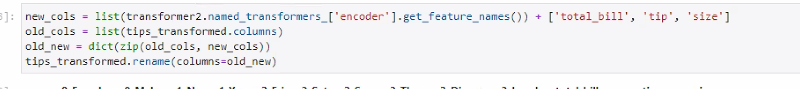

In [34]:
new_cols = list(transformer2.named_transformers_['encoder'].get_feature_names()) + ['total_bill', 'tip', 'size']
old_cols = list(tips_encoded_sklearn2.columns)
old_new = dict(zip(old_cols, new_cols))
tips_encoded_sklearn2.rename(columns=old_new)

,x0_Female,x0_Male,x1_No,x1_Yes,x2_Fri,x2_Sat,x2_Sun,x2_Thur,x3_Dinner,x3_Lunch,total_bill,tip,size
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


>## Ordinal Encoding .map

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.
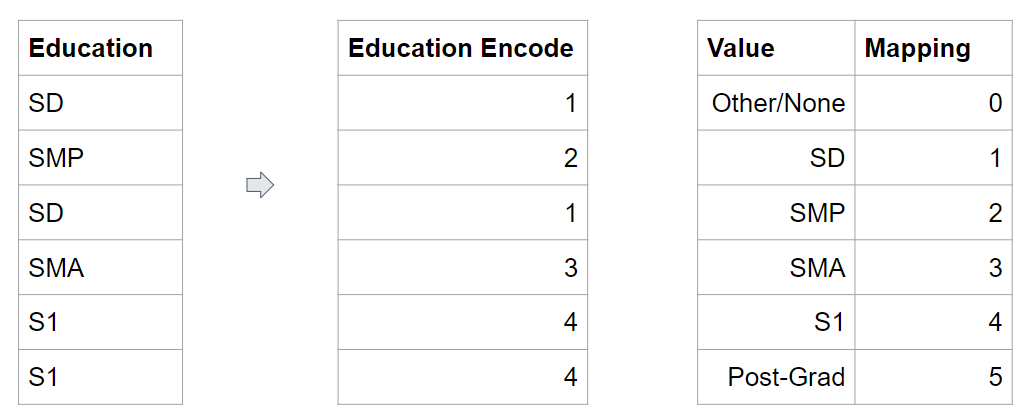

In [35]:
tips_ordinal_encoded = tips.copy()

In [36]:
tips_ordinal_encoded['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [37]:
tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({"Thur": 1, "Fri": 2, "Sat": 3, "Sun": 4})

In [38]:
display(tips)
display(tips_ordinal_encoded)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


>## ORdinal Encoding category_encoders library

In [39]:
# !pip install category_encoders

In [40]:
import category_encoders as ce

In [41]:
ordinal_mapping = [
    {
        'col': 'day',
         'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}
    }
]

ordinal_encoder = ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [42]:
tips_ordinal_encoded.drop('day', axis=1, inplace=True)
tips_ordinal_encoded['day_ce'] = dford
tips_ordinal_encoded

,total_bill,tip,sex,smoker,time,size,day_ce
0,16.99,1.01,Female,No,Dinner,2,4
1,10.34,1.66,Male,No,Dinner,3,4
2,21.01,3.50,Male,No,Dinner,3,4
3,23.68,3.31,Male,No,Dinner,2,4
4,24.59,3.61,Female,No,Dinner,4,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,3
240,27.18,2.00,Female,Yes,Dinner,2,3
241,22.67,2.00,Male,Yes,Dinner,2,3
242,17.82,1.75,Male,No,Dinner,2,3


In [43]:
ordinal_mapping2 = [
    {
        'col': 'day',
         'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}
    },
    {
        'col': 'time',
        'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}
    }
]

ordinal_encoder2 = ce.OrdinalEncoder(cols=['day', 'time'], mapping=ordinal_mapping2)
dford2 = ordinal_encoder2.fit_transform(tips[['day', 'time']])
dford2

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


In [44]:
tips_ordinal_encoded.drop('day_ce', axis=1, inplace=True)
tips_ordinal_encoded = pd.concat([tips_ordinal_encoded, dford2], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,time,size,day,time
0,16.99,1.01,Female,No,Dinner,2,4,2
1,10.34,1.66,Male,No,Dinner,3,4,2
2,21.01,3.50,Male,No,Dinner,3,4,2
3,23.68,3.31,Male,No,Dinner,2,4,2
4,24.59,3.61,Female,No,Dinner,4,4,2
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,3,2
240,27.18,2.00,Female,Yes,Dinner,2,3,2
241,22.67,2.00,Male,Yes,Dinner,2,3,2
242,17.82,1.75,Male,No,Dinner,2,3,2


>## Binary Encoding

Binary encoding using category_encoder library. We will implement binary ecoding using the category_encoders library. We will implement binary encoding to day variable

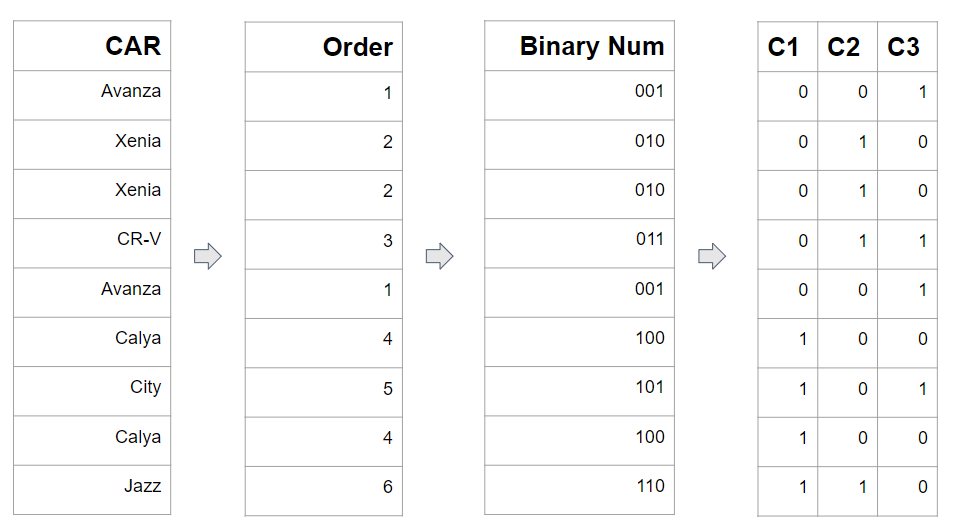

In [45]:
import category_encoders as ce

In [46]:
binary_encoder = ce.BinaryEncoder(cols = ['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [47]:
dfbin['day] = df['day'].unique()

SyntaxError: invalid syntax (<ipython-input-47-7f90c9d0ed82>, line 1)

In [48]:
tips_binary_encoded = pd.concat([tips[['total_bill', 'tip', 'sex', 'smoker', 'time', 'size']], dfbin.iloc[:,:-1]], axis=1)
tips_binary_encoded

,total_bill,tip,sex,smoker,time,size,day_0,day_1
0,16.99,1.01,Female,No,Dinner,2,0,0
1,10.34,1.66,Male,No,Dinner,3,0,0
2,21.01,3.50,Male,No,Dinner,3,0,0
3,23.68,3.31,Male,No,Dinner,2,0,0
4,24.59,3.61,Female,No,Dinner,4,0,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,1
240,27.18,2.00,Female,Yes,Dinner,2,0,1
241,22.67,2.00,Male,Yes,Dinner,2,0,1
242,17.82,1.75,Male,No,Dinner,2,0,1


# Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

>## Data

In [49]:
from sklearn.model_selection import train_test_split # data splitting

from sklearn.linear_model import Ridge # ML model

from sklearn.metrics import mean_squared_error # evaluation

In [50]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


>## Preprocessing

preprocess scheme:
1. one hot encoding : sex, smoker, time
1. binary encoding : day
1. robust scaler : total_bill
1. no treatment : size

In [51]:
transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
    ('binary', ce.BinaryEncoder(), ['day']),
    ('robust scaler', RobustScaler(), ['total_bill'])
], remainder = 'passthrough')

>## Data Splitting

In [52]:
features = tips.drop('tip', axis=1).columns
X = tips[features]
y = tips['tip']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 6), (74, 6), (170,), (74,))

In [54]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [55]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

In [56]:
X_train_preprocessed

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,1.0,1.260554,3.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.081253,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,-0.613255,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,-0.524285,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,-0.086700,2.0
...,...,...,...,...,...,...,...,...
165,1.0,0.0,0.0,0.0,0.0,1.0,0.018611,3.0
166,1.0,0.0,0.0,0.0,1.0,1.0,0.380844,2.0
167,1.0,0.0,0.0,0.0,0.0,1.0,-0.372674,2.0
168,0.0,0.0,1.0,0.0,1.0,0.0,1.127099,6.0


In [57]:
X_test_preprocessed

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,1.0,-0.106673,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.263731,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.324557,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.082161,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.215615,2.0
...,...,...,...,...,...,...,...,...
69,1.0,0.0,1.0,0.0,1.0,0.0,2.161144,5.0
70,0.0,0.0,0.0,0.0,0.0,1.0,-0.211076,2.0
71,1.0,0.0,0.0,0.0,0.0,1.0,0.039492,2.0
72,1.0,0.0,0.0,0.0,1.0,1.0,0.862006,4.0


In [58]:
transformer.transformers_

[('one_hot',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['sex', 'smoker', 'time']),
 ('binary',
  BinaryEncoder(cols=None, drop_invariant=False, handle_missing='value',
                handle_unknown='value', mapping=None, return_df=True, verbose=0),
  ['day']),
 ('robust scaler',
  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
               with_scaling=True),
  ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [59]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [60]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [61]:
features = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1].get_feature_names()) + ['total_bill scaled', 'size']
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

In [62]:
display(X_train_preprocessed)
display(X_test_preprocessed)

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,0.0,0.0,0.0,0.0,1.0,1.260554,3.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.081253,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,-0.613255,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,-0.524285,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,-0.086700,2.0
...,...,...,...,...,...,...,...,...
165,1.0,0.0,0.0,0.0,0.0,1.0,0.018611,3.0
166,1.0,0.0,0.0,0.0,1.0,1.0,0.380844,2.0
167,1.0,0.0,0.0,0.0,0.0,1.0,-0.372674,2.0
168,0.0,0.0,1.0,0.0,1.0,0.0,1.127099,6.0


,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,0.0,0.0,0.0,0.0,1.0,1.0,-0.106673,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.263731,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.324557,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.082161,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.215615,2.0
...,...,...,...,...,...,...,...,...
69,1.0,0.0,1.0,0.0,1.0,0.0,2.161144,5.0
70,0.0,0.0,0.0,0.0,0.0,1.0,-0.211076,2.0
71,1.0,0.0,0.0,0.0,0.0,1.0,0.039492,2.0
72,1.0,0.0,0.0,0.0,1.0,1.0,0.862006,4.0


>## Model Fitting and Evaluation

next, we fit the model using traning set and evaluate the model based on test set. We obtain mse 1.0291

In [63]:
model = Ridge()
model.fit(X_train_preprocessed, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
y_pred = model.predict(X_test_preprocessed)
print('mse:', mean_squared_error(y_test, y_pred))

mse: 1.029092584694234


>## Model Properties

In this section we show the model properties. We show the linear regression's coefficient for interpretation purpose.

In [65]:
coef_table = pd.DataFrame({
    'features': features,
    'coef': model.coef_
})

In [66]:
coef_table

,features,coef
0,x0_Male,-0.143779
1,x1_Yes,-0.135949
2,x2_Lunch,0.140186
3,day_0,0.163201
4,day_1,0.026447
5,day_2,0.066672
6,total_bill scaled,1.169090
7,size,0.125055


# Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

>## Data

In [67]:
from sklearn.tree import DecisionTreeRegressor, plot_tree # ML model

In [68]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


>## Preprocessing

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [69]:
ordinal_mapping = [
    {'col': 'day',
    'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
    {'col': 'time',
    'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols=['day', 'time'], mapping=ordinal_mapping)

In [70]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker']),
    ('ordinal', ordinal_encoder, ['day', 'time'])
], remainder = 'passthrough')

>## Data Splitting

splitting the data into 70% training set and 30% training set.

In [71]:
features = tips.drop('tip', axis=1).columns
X = tips[features]
y = tips['tip']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 6), (74, 6), (170,), (74,))

>## Data Transform

In [73]:
X_train_preprocessed = pd.DataFrame(transformer.fit_transform(X_train))
X_test_preprocessed = pd.DataFrame(transformer.transform(X_test))
X_train_preprocessed

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,3,4,5
0,1.0,0.0,3.0,2.0,31.27,3.0
1,1.0,0.0,1.0,1.0,18.28,2.0
2,0.0,1.0,3.0,2.0,10.63,2.0
3,1.0,0.0,3.0,2.0,11.61,2.0
4,0.0,0.0,1.0,1.0,16.43,2.0
...,...,...,...,...,...,...
165,1.0,0.0,3.0,2.0,17.59,3.0
166,1.0,0.0,4.0,2.0,21.58,2.0
167,1.0,0.0,3.0,2.0,13.28,2.0
168,0.0,0.0,1.0,1.0,29.80,6.0


In [74]:
transformer.transformers_

[('onehot',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['sex', 'smoker']),
 ('ordinal', OrdinalEncoder(cols=['day', 'time'], drop_invariant=False,
                 handle_missing='value', handle_unknown='value',
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}},
                          {'col': 'time',
                           'mapping': {None: 0, 'Dinner': 2, 'Lunch': 1}}],
                 return_df=True, verbose=0), ['day', 'time']),
 ('remainder', 'passthrough', [0, 5])]

In [75]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes'], dtype=object)

In [76]:
transformer.transformers_[1][1].get_feature_names()

['day', 'time']

In [77]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill','size']
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Male,x1_Yes,day,time,total_bill,size
0,1.0,0.0,3.0,2.0,31.27,3.0
1,1.0,0.0,1.0,1.0,18.28,2.0
2,0.0,1.0,3.0,2.0,10.63,2.0
3,1.0,0.0,3.0,2.0,11.61,2.0
4,0.0,0.0,1.0,1.0,16.43,2.0
...,...,...,...,...,...,...
165,1.0,0.0,3.0,2.0,17.59,3.0
166,1.0,0.0,4.0,2.0,21.58,2.0
167,1.0,0.0,3.0,2.0,13.28,2.0
168,0.0,0.0,1.0,1.0,29.80,6.0


>## Model Fitting and Evaluation

In [78]:
dtc = DecisionTreeRegressor(max_depth=3)
dtc.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
y_pred = dtc.predict(X_test_preprocessed)
print('mse: ', mean_squared_error(y_test, y_pred))

mse:  0.8292584375206998


>## Model Properties

In [80]:
importance_df = pd.DataFrame({
    'importance': dtc.feature_importances_
}, index=features)

importance_df

,importance
x0_Male,0.000000
x1_Yes,0.101052
day,0.000000
time,0.000000
total_bill,0.896545
size,0.002403


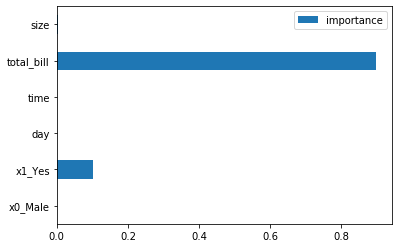

In [81]:
importance_df.plot(kind='barh');

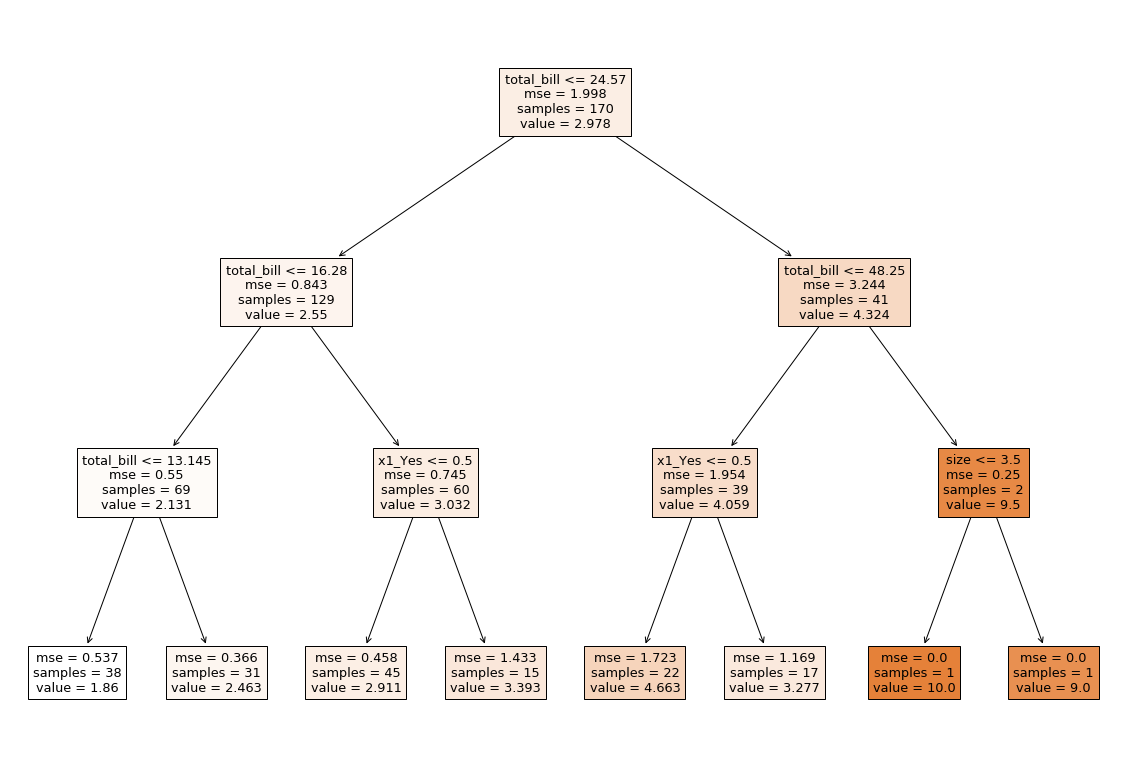

In [82]:
plt.figure(figsize=(20,14))
plot_tree(dtc, feature_names=features, filled=True)
plt.show()

In [83]:
X_test_preprocessed.iloc[[3]]
y_test[63]

3.76

In [84]:
dtc.predict(X_test_preprocessed.iloc[[3]])

array([3.39333333])

cara tracking
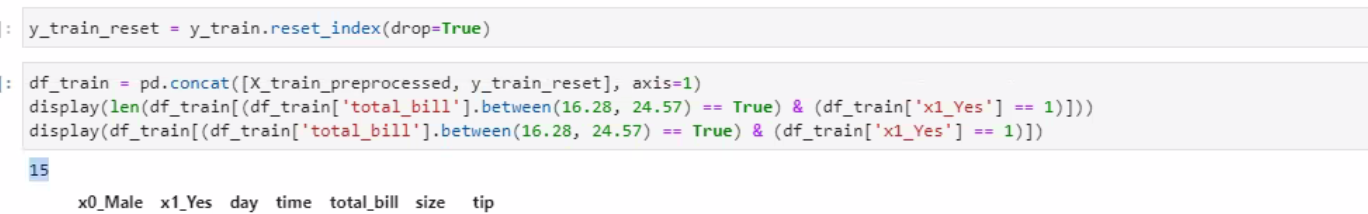

In [85]:
df_train = pd.concat([X_train_preprocessed, y_train], axis=1)
X_train_preprocessed[(df_train['total_bill'].between(16.28, 24.57) == True) & (df_train['x1_Yes'] == 1)]

C:\Users\Damianus Deni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,x0_Male,x1_Yes,day,time,total_bill,size
5,1.0,1.0,3.0,2.0,24.27,2.0
11,1.0,1.0,4.0,2.0,17.89,2.0
16,0.0,1.0,4.0,2.0,18.15,3.0
17,1.0,1.0,3.0,2.0,22.67,2.0
26,0.0,1.0,1.0,1.0,16.40,2.0
30,0.0,1.0,1.0,1.0,19.81,2.0
33,1.0,1.0,1.0,1.0,16.58,2.0
43,1.0,1.0,3.0,2.0,24.01,4.0
46,0.0,1.0,3.0,2.0,22.12,2.0
60,1.0,1.0,4.0,2.0,23.10,3.0


In [86]:
df_train.isna().sum()

x0_Male       51
x1_Yes        51
day           51
time          51
total_bill    51
size          51
tip           51
dtype: int64

# Outlier
This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [87]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]


C:\Users\Damianus Deni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [88]:
df_association = pd.DataFrame({
    'x': x,
    'y': y,
#     'y_real': y_real
})

df_association

,x,y
0,156.11,57.61
1,158.76,54.65
2,155.79,57.61
3,161.54,55.96
4,157.61,56.22
...,...,...
95,164.58,57.54
96,159.22,58.91
97,163.53,61.71
98,162.87,60.11


In [89]:
from sklearn.linear_model import LinearRegression

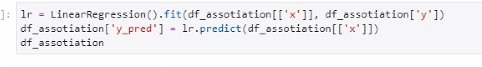

In [90]:
lr = LinearRegression().fit(df_association[['x']], df_association[['y']])
df_association['y_pred'] = lr.predict(df_association[['x']])
df_association

,x,y,y_pred
0,156.11,57.61,56.589928
1,158.76,54.65,57.386111
2,155.79,57.61,56.493785
3,161.54,55.96,58.221353
4,157.61,56.22,57.040598
...,...,...,...
95,164.58,57.54,59.134711
96,159.22,58.91,57.524317
97,163.53,61.71,58.819242
98,162.87,60.11,58.620947


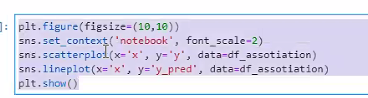

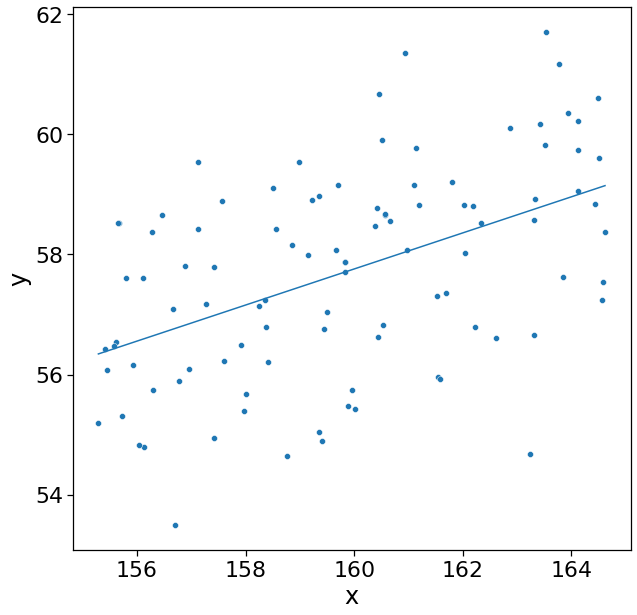

In [91]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(x='x', y='y', data=df_association)
sns.lineplot(x='x', y='y_pred', data=df_association)
plt.show()

>## Global Outlier

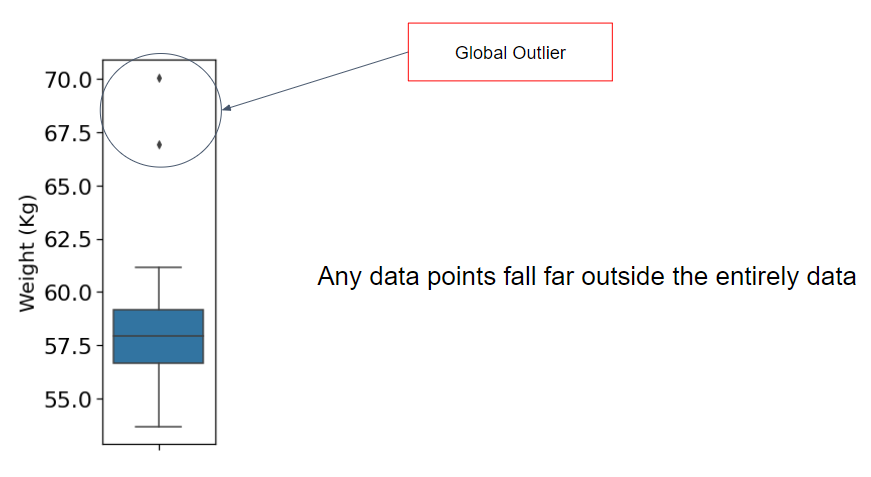

In [92]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

df_add = pd.DataFrame({
    'x' : x,
    'y' : y
})

lr2 = LinearRegression().fit(df_add[['x']], df_add['y'])
df_add['y_pred'] = lr2.predict(df_add[['x']])

df_asso_outlier = df_association.append(df_add)

C:\Users\Damianus Deni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


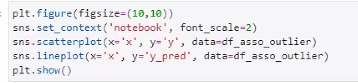

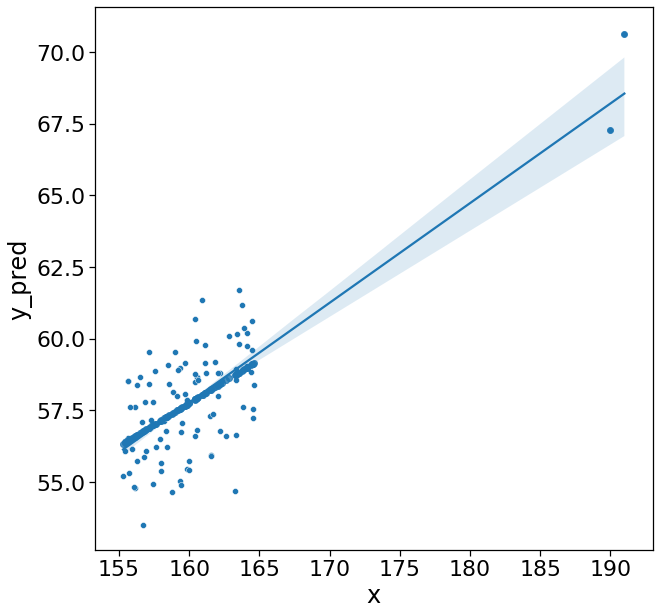

In [93]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(x='x', y='y', data=df_asso_outlier)
# sns.lineplot(x='x', y='y_pred', data=df_asso_outlier)
sns.regplot(x='x', y='y_pred', data=df_asso_outlier)
plt.show()

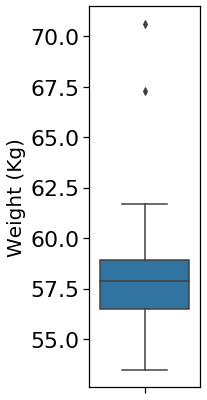

In [94]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_asso_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize=20)
plt.show()

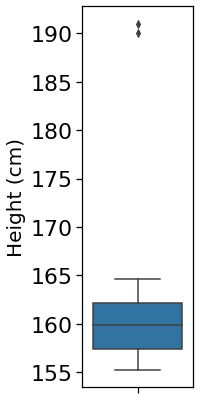

In [95]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_asso_outlier['x'])
plt.ylabel('Height (cm)', fontsize=20)
plt.show()

>## Contextual Outlier

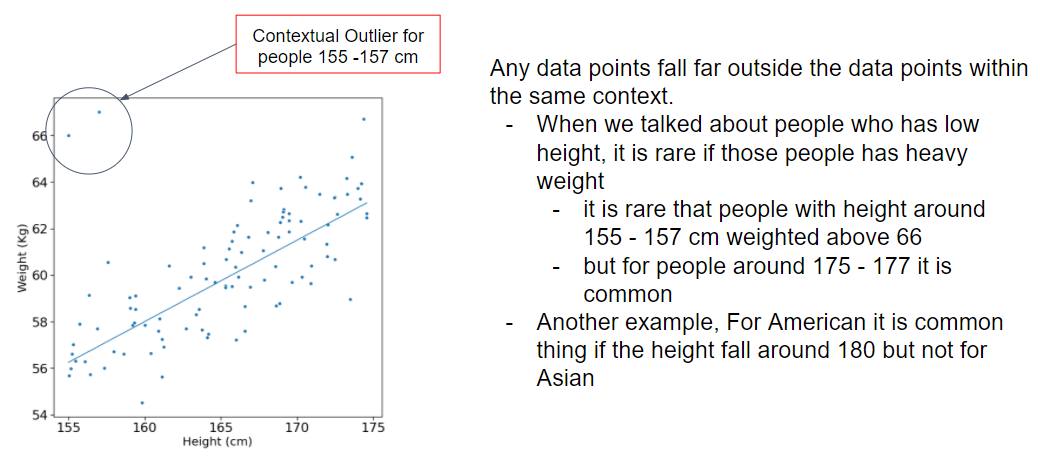

In [96]:
df_asso = df_association.drop('y_pred', axis=1).copy()
df_asso

,x,y
0,156.11,57.61
1,158.76,54.65
2,155.79,57.61
3,161.54,55.96
4,157.61,56.22
...,...,...
95,164.58,57.54
96,159.22,58.91
97,163.53,61.71
98,162.87,60.11


In [97]:
x = [155, 157]
y = [66, 67]

df_context = pd.DataFrame({
    'x': x,
    'y': y
})

df_asso_context = df_asso.append(df_context)

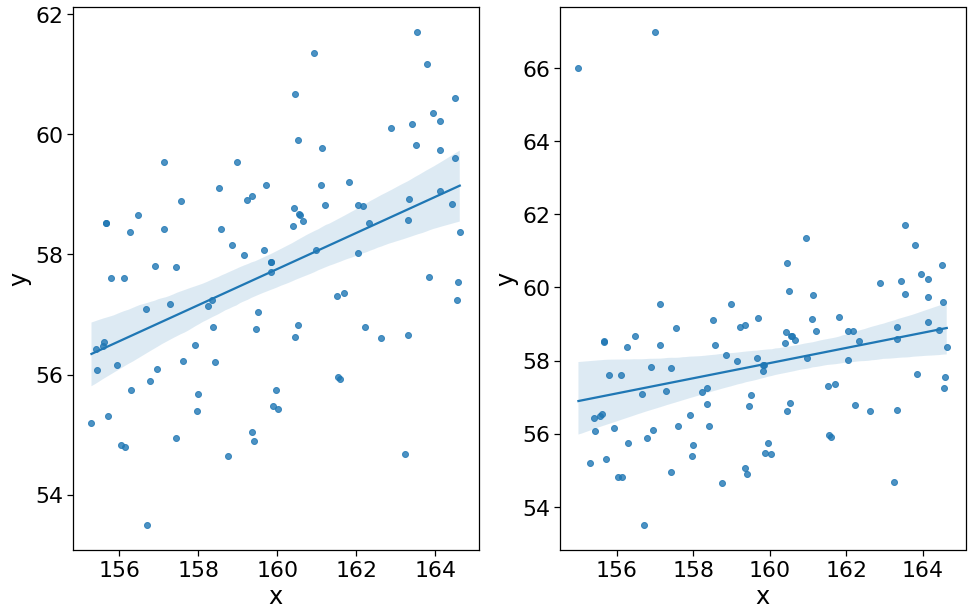

In [98]:
plt.figure(figsize=(16,10))

plt.subplot(121)
sns.regplot(x='x', y='y', data=df_asso)

plt.subplot(122)
sns.regplot(x='x', y='y', data=df_asso_context)

plt.show()

>## Influential Observation

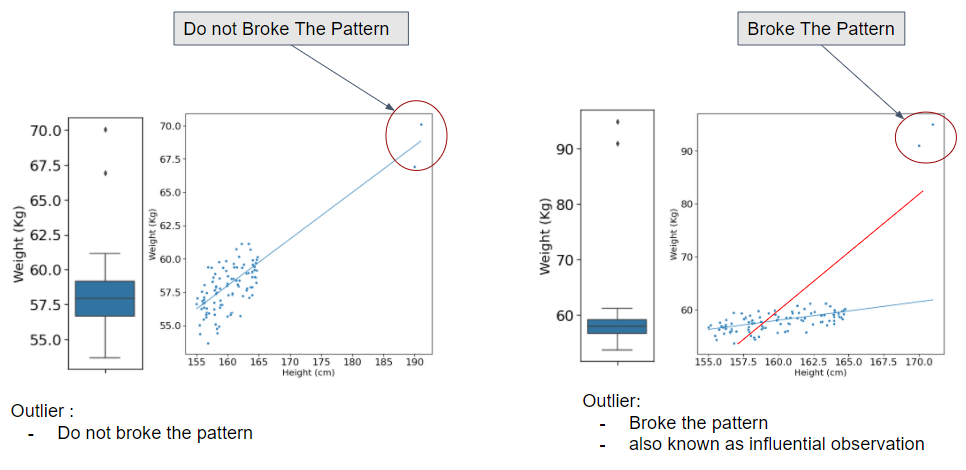

In [99]:
x = [170, 171, 173, 180]
y = [91, 95, 95, 100]

df_influenz = pd.DataFrame({
    'x': x,
    'y': y
})

df_asso_influenz = df_asso.append(df_influenz)

In [100]:
df_asso_influenz

,x,y
0,156.11,57.61
1,158.76,54.65
2,155.79,57.61
3,161.54,55.96
4,157.61,56.22
...,...,...
99,157.42,57.79
0,170.00,91.00
1,171.00,95.00
2,173.00,95.00


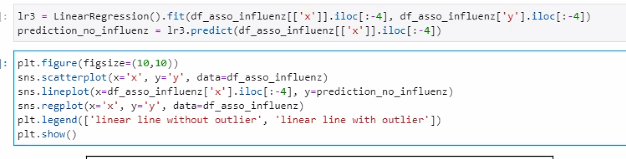

In [101]:
lr3 = LinearRegression().fit(df_asso_influenz[['x']].iloc[:-4], df_asso_influenz['y'].iloc[:4])
prediction_no_influenz = lr3.predict(df_asso_influenz[['x']].iloc[:-4])

ValueError: Found input variables with inconsistent numbers of samples: [100, 4]

# Missing Value

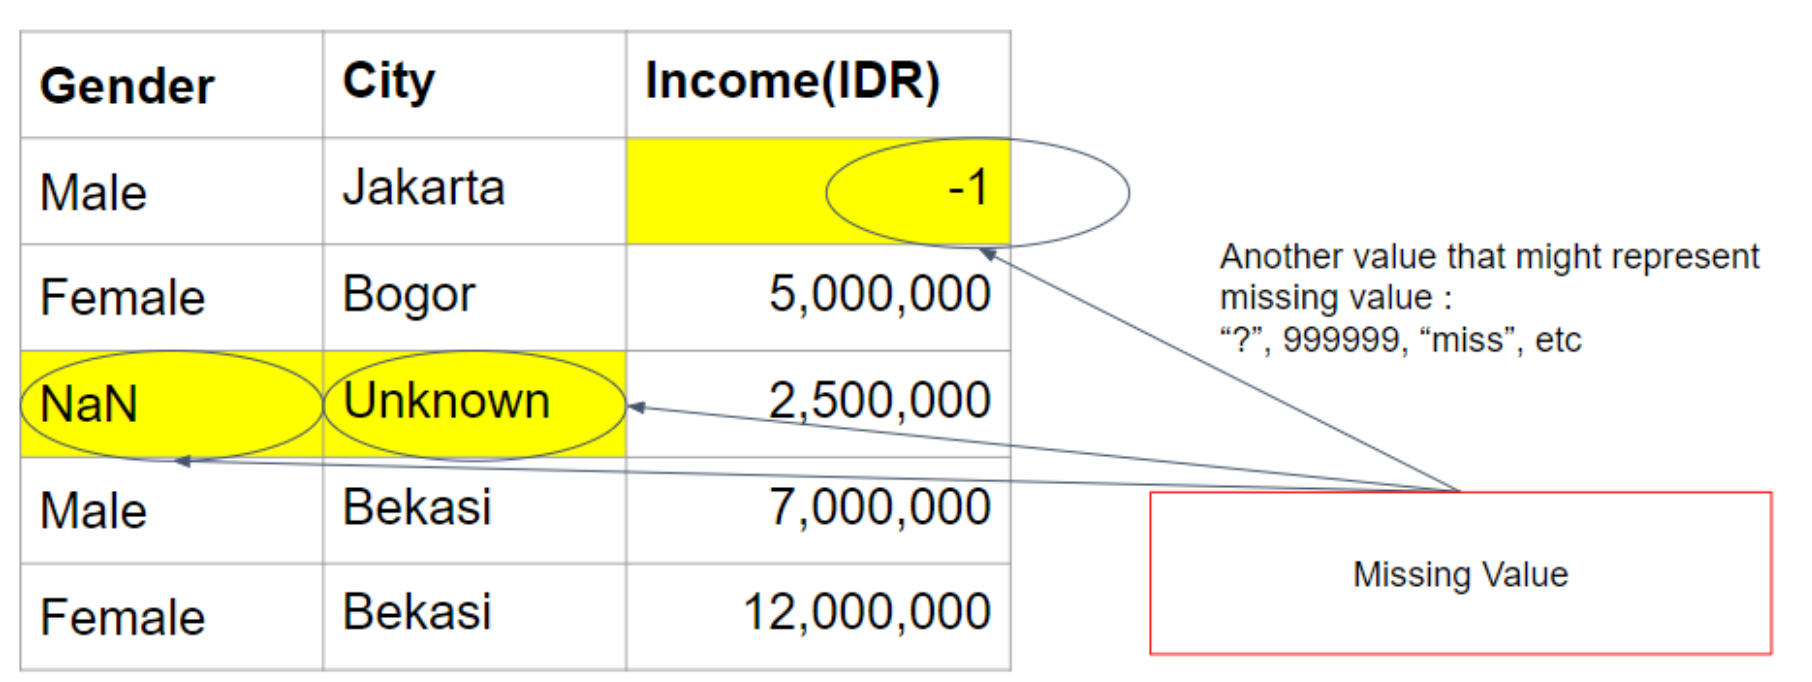

>## Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
    })

we have a dataframe and each variabels has at least one missing value

In [ ]:
df

then we input missing value of the each numerical variabel, x1 x2 and x3, using its mean. If you are more interested in median you can change the argument into "median".

In [ ]:
df['x1'] = df['x1'].fillna(method='ffill')
df

In [ ]:
imp_num = SimpleImputer(strategy='mean')
df[['x1','x2','x3']] = imp_num.fit_transform(df[['x1','x2','x3']])
df

Missing values in the categorical variables, x4 anf x5, will be inputed using mode.

In [ ]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4','x5']] = imp_mode.fit_transform(df[['x4','x5']])
df

for the last variabel we input the missing value using certain value. this technique also can be applied in some condition.

In [ ]:
imp_const = SimpleImputer(strategy='constant', fill_value = 'P')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

>## Iterative Imputer

interative imputer works for numerical only. You can fill the missing value simultaneusly.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

df

In [ ]:
imp_iter = IterativeImputer(max_iter=10, random_state=0)
df[['x1','x2','x3']] = imp_iter.fit_transform(df[['x1','x2','x3']])

In [ ]:
df

>## Nearest Neighbour

Nearest negihbour imputer also work for numerical only. You can also fill the missing value simultaneusly.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

df

In [ ]:
imp_knn = KNNImputer(n_neighbors=3, weights='uniform')
df[['x1', 'x2', 'x3']] = imp_knn.fit_transform(df[['x1', 'x2', 'x3']])

In [ ]:
df

# Generate New Features: Polynomial
Relationship between variables often appear to be unlinear. Thus, when you still wanna use linear model (logistic regression and linear regression) you can add polynomial features.

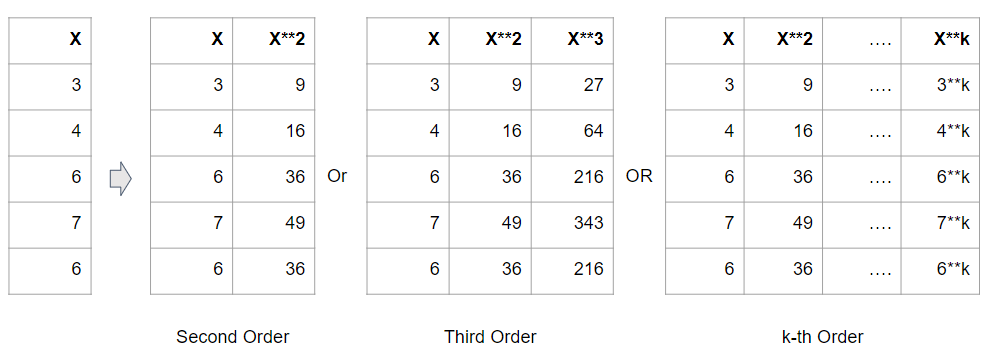

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In the illustration below, you can see how is the effect of the polynomial feature. We will do modeling twice. First, without polynomial features. Second, with polynomial features. The target variabel is
1. (+) a good quality wine : quality > 6
1. (-) a bad quality wine : quality <= 6

<br>
Features: alcohol and density

In [ ]:
wine = pd.read_csv('data/Data/white_wine.csv')
wine.head()

In [ ]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality'] > 6, 1, 0)
wine.label.value_counts()

In [ ]:
X = wine[['density', 'alcohol']]
y = wine['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

MODEL 1: without polynomial

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy w/o Polynomial: ', accuracy_score(y_test, y_pred))

MODEL 2: with polynomial

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)



In [ ]:
X.columns

In [ ]:
poly.get_feature_names()

In [ ]:
pd.DataFrame(X_train_poly, columns=poly.get_feature_names())

In [ ]:
X_train.head()

In [ ]:
logreg_poly = LogisticRegression(max_iter = 1000)
logreg_poly.fit(X_train_poly,y_train)
# logreg_poly = LogisticRegression().fit(X_train_poly, y_train)

In [ ]:
y_pred_poly = logreg_poly.predict(X_test_poly)
print("accuracy", accuracy_score(y_test, y_pred_poly))

The changes in performance is significantly increase accuracy from 85.38 % to 96.92 %. From this illustration we know that polynomial feature can improve model performance.

# Binning
There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

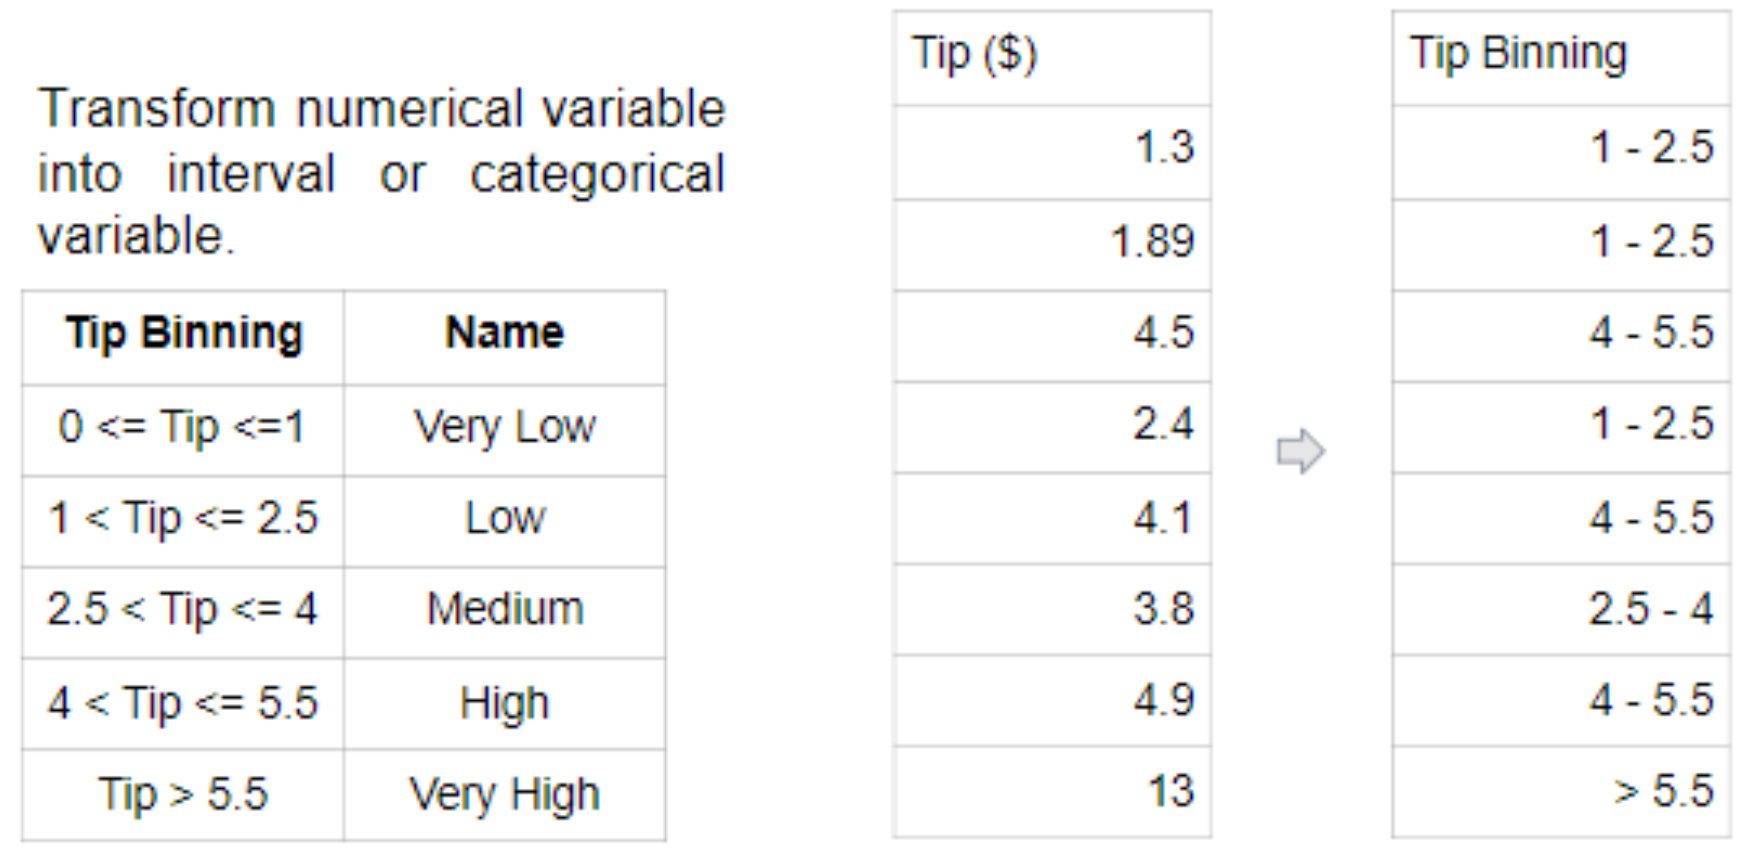

In [102]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

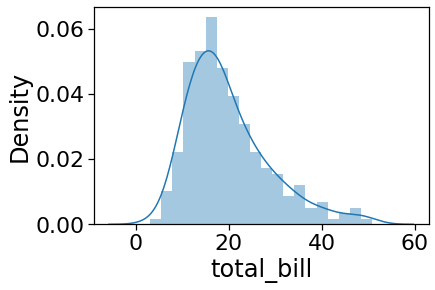

In [103]:
sns.distplot(tips['total_bill'],bins=20)

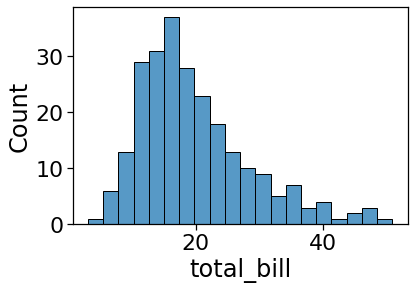

In [104]:
sns.histplot(tips['total_bill'],  bins=20)

ECDF

In [105]:
# X_axis = tips['total_bill']
# y_axis = [x/len(tips['total_bill'] for x in np.sort(tips['total_bill']))]

# sns.lineplot(x=X_axis, y=y_axis)
# plt.show()

In [106]:
tips['total_bill_eqfreq'] = pd.qcut(tips['total_bill'], 5)
tips['total_bill_eqfreq_encoded'] = pd.qcut(tips['total_bill'], 5, labels=range(1,6))
tips

,total_bill,tip,sex,smoker,day,time,size,total_bill_eqfreq,total_bill_eqfreq_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,"(26.098, 50.81]",5
240,27.18,2.00,Female,Yes,Sat,Dinner,2,"(26.098, 50.81]",5
241,22.67,2.00,Male,Yes,Sat,Dinner,2,"(19.818, 26.098]",4
242,17.82,1.75,Male,No,Sat,Dinner,2,"(16.222, 19.818]",3


In [107]:
tips['total_bill_eqfreq_encoded'].value_counts()

1    49
2    49
4    49
5    49
3    48
Name: total_bill_eqfreq_encoded, dtype: int64

In [108]:
tips['total_bill_eqintv'] = pd.qcut(tips['total_bill'], 5)
tips['total_bill_eqintv_encoded'] = pd.qcut(tips['total_bill'], 5, labels=range(1,6))
tips

,total_bill,tip,sex,smoker,day,time,size,total_bill_eqfreq,total_bill_eqfreq_encoded,total_bill_eqintv,total_bill_eqintv_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3,"(16.222, 19.818]",3
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1,"(3.069, 12.636]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4,"(19.818, 26.098]",4
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4,"(19.818, 26.098]",4
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4,"(19.818, 26.098]",4
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,"(26.098, 50.81]",5,"(26.098, 50.81]",5
240,27.18,2.00,Female,Yes,Sat,Dinner,2,"(26.098, 50.81]",5,"(26.098, 50.81]",5
241,22.67,2.00,Male,Yes,Sat,Dinner,2,"(19.818, 26.098]",4,"(19.818, 26.098]",4
242,17.82,1.75,Male,No,Sat,Dinner,2,"(16.222, 19.818]",3,"(16.222, 19.818]",3


>## Equal Frequencies: Quantile

Binning method which resullted of the equal frequency in each classes and different length of the classes.

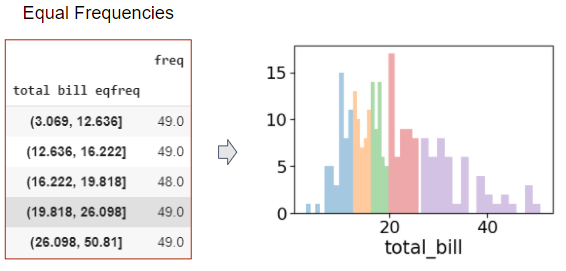

In [109]:
eqfreq = tips.pivot_table(
    index='total_bill_eqfreq',
    aggfunc = len,
    values = 'tip'
)

eqfreq.columns = ['freq']
eqfreq

,freq
total_bill_eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


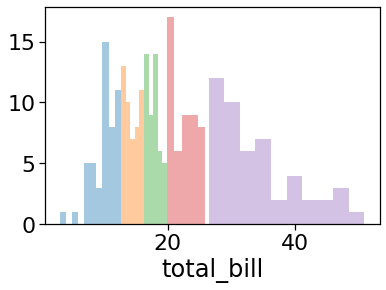

In [111]:
for i,j in zip(range(1,6), [10,5,5,5,10]):
    sns.distplot(tips[tips['total_bill_eqfreq_encoded'] == i]['total_bill'], kde=False, bins=j)
plt.show()    

>## Equal Interval: Uniform

Binning method which resullted of the equal length of the classes and different frequency in each classes.

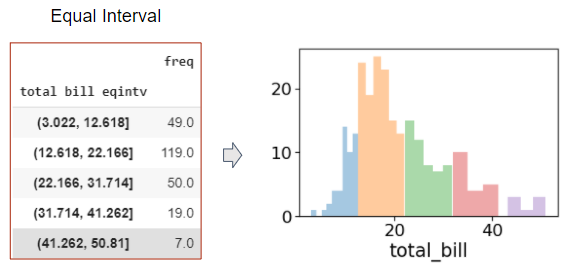

In [112]:
tips['total_bill_eqintv'].value_counts().to_frame()

,total_bill_eqintv
"(3.069, 12.636]",49
"(12.636, 16.222]",49
"(19.818, 26.098]",49
"(26.098, 50.81]",49
"(16.222, 19.818]",48


> ## Binning Effect on Modelling

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [114]:
from sklearn.preprocessing import KBinsDiscretizer

In [124]:
disk = pd.read_csv("data/Data/disk.csv")
disk

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1
...,...,...
1524,58,1
1525,64,1
1526,47,0
1527,26,1


In [125]:
disk['class'].value_counts()/disk.shape[0]*100

1    51.863963
0    48.136037
Name: class, dtype: float64

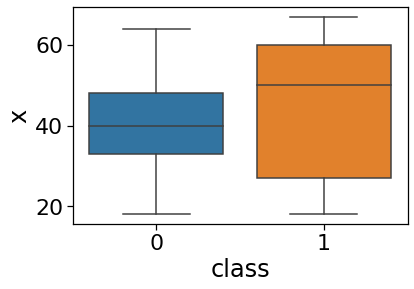

In [126]:
sns.boxplot(x='class', y='x', data=disk);

<Figure size 720x720 with 0 Axes>

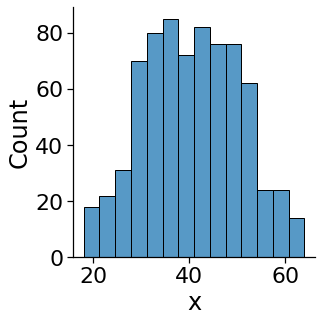

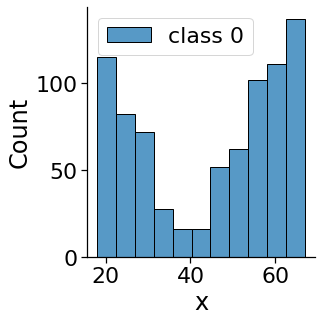

In [127]:
plt.figure(figsize=(10,10))
sns.displot(disk[disk['class'] == 0]['x'])
sns.displot(disk[disk['class'] == 1]['x'])
plt.legend(['class 0', 'class 1'])
plt.show()

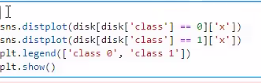

In [128]:
disk['class'].value_counts(normalize=True)

1    0.51864
0    0.48136
Name: class, dtype: float64

In [129]:
disk['x_eqintv'] = pd.cut(disk['x'], 7)
disk['x_eqintv_encoded'] = pd.cut(disk['x'], 7, labels=range(1,8))
disk

,x,class,x_eqintv,x_eqintv_encoded
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7
...,...,...,...,...
1524,58,1,"(53.0, 60.0]",6
1525,64,1,"(60.0, 67.0]",7
1526,47,0,"(46.0, 53.0]",5
1527,26,1,"(25.0, 32.0]",2


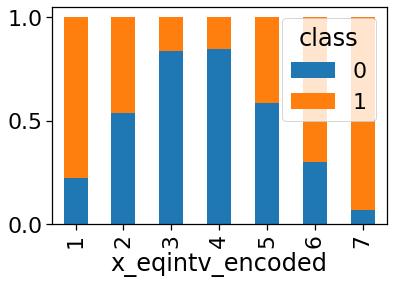

In [132]:
pd.crosstab(disk['x_eqintv_encoded'], disk['class'], normalize=0).plot(kind='bar', stacked=True)

In [134]:
pd.crosstab(disk['x_eqintv_encoded'], disk['class'])

class,0,1
x_eqintv_encoded,,
1,51,176
2,116,100
3,183,36
4,160,29
5,143,102
6,69,159
7,14,191


from illustration above, you can see that the x variabel alraedy binned into seven categories and you can see the class proportion aswell. The propotion of the '1' class keep decreasing until the fourth class and after that the proportion increase instead. This show a non linear relationship between x and the probability of the '1' class. Adding polynomial feature surely can improve the performance but we will try binning instead.

MODEL 1: Without Binning

This is the modeling when we dont use binning. we dont give any treatment to the feature. The model accuracy is 58.22%.

In [137]:
X = disk[['x']]
y = disk['class']
X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1146, 1), (383, 1), (1146,), (383,))

In [140]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
y_pred = logreg.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))

accuracy 0.5822454308093995


MODEL 2: With binning

In [157]:
discretize = KBinsDiscretizer(n_bins = 7, encode = 'onehot', strategy = 'uniform')
discretize.fit(X_train) 
X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [158]:
print(X_train_disc[:5])

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 5)	1.0
  (3, 3)	1.0
  (4, 6)	1.0


In [159]:
logreg_disc = LogisticRegression()
logreg_disc.fit(X_train_disc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
y_pred_disc = logreg.predict(X_test_disc)
print('accuracy',accuracy_score(y_test,y_pred_disc))

accuracy 0.6997389033942559


Polynomial

In [147]:
polynom = PolynomialFeatures(degree=2, include_bias=False)
polynom.fit(X_train)
X_train_pol = discretize.transform(X_train)
X_test_pol = discretize.transform(X_train)

In [149]:
X_train_pol

<1146x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1146 stored elements in Compressed Sparse Row format>

# Apply Several Preprocessing Method to Modeling at once Part 2

> ## Table Of Contents

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

> ## Data

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [161]:
adult = pd.read_csv('data/Data/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [164]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [166]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [167]:
adult.replace('?', np.nan, inplace=True)

In [168]:
adult.isna().sum()/len(adult)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

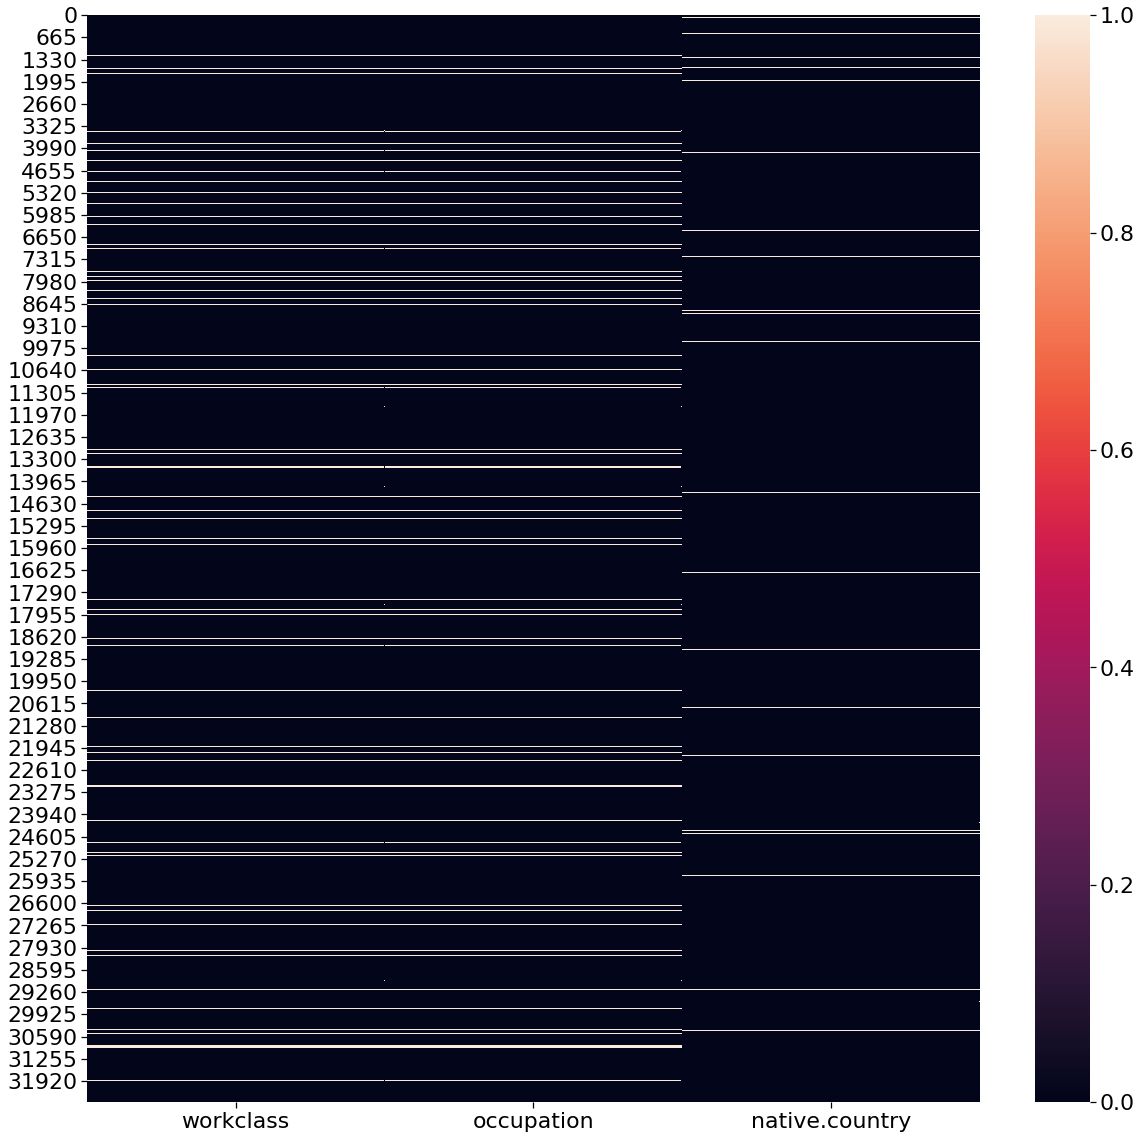

In [170]:
plt.figure(figsize=(20,20))
sns.heatmap(adult[['workclass', 'occupation', 'native.country']].isnull());

>## Preprocessing

In [171]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [172]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [177]:
categorical_features = adult.columns[adult.dtypes == object]
adult[categorical_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [178]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

In [179]:
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NC')),
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary', binary_encoder_pipeline, 'workclass marital.status occupation native.country'.split()),
], remainder = 'passthrough')

>## Data Splitting

In [180]:
X = adult.drop(columns=["fnlwgt", 'income', 'education'])
y = np.where(adult['income']=='>50K', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24420, 12), (8141, 12), (24420,), (8141,))

>## Data Transformation

In [181]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
13761,63,Local-gov,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
7085,47,Private,13,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,El-Salvador
21420,90,Private,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
2774,64,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,7298,0,45,United-States
21708,33,Private,13,Separated,Sales,Not-in-family,White,Female,0,0,50,United-States


In [185]:
X_train_preprocessed = pd.DataFrame(transformer.fit_transform(X_train))
X_test_preprocessed = pd.DataFrame(transformer.transform(X_train))

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [186]:
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,25.0,10.0,0.0,0.0,35.0
24416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,51.0,15.0,3325.0,0.0,40.0
24417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,60.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,23.0,10.0,0.0,0.0,30.0


In [187]:
X_test_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,25.0,10.0,0.0,0.0,35.0
24416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,51.0,15.0,3325.0,0.0,40.0
24417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,60.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,23.0,10.0,0.0,0.0,30.0


In [190]:
transformer.transformers_

[('onehot',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['relationship', 'race', 'sex']),
 ('binary', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value='NC',
                                 missing_values=nan, strategy='constant',
                                 verbose=0)),
                  ('binary',
                   BinaryEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0))],
           verbose=False), ['workclass',
   'marital.status',
   'occupation',
   'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [194]:
onehote_features = list(transformer.transformers_[0][1].get_feature_names())
onehote_features

['x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Male']

In [197]:
binary_features = list(transformer.transformers_[1][1]['binary'].get_feature_names())
binary_features

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [202]:
remainder_features = list(X_train.columns[list(transformer.transformers_[2][2])])
remainder_features

['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [203]:
features = onehote_features + binary_features + remainder_features
features

['x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Male',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [204]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

In [205]:
X_train_preprocessed.head()

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0


>## Model Fitting and Evaluation

In [213]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [214]:
y_pred = model.predict(X_test_preprocessed)
print('accuracy:',accuracy_score(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [8141, 24420]

>## Model Properties

In [215]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [216]:
importance_table

,imp
x0_Not-in-family,0.000000
x0_Other-relative,0.000000
x0_Own-child,0.000000
x0_Unmarried,0.000000
x0_Wife,0.000000
x1_Asian-Pac-Islander,0.000000
x1_Black,0.000000
x1_Other,0.000000
x1_White,0.000000
x2_Male,0.000000


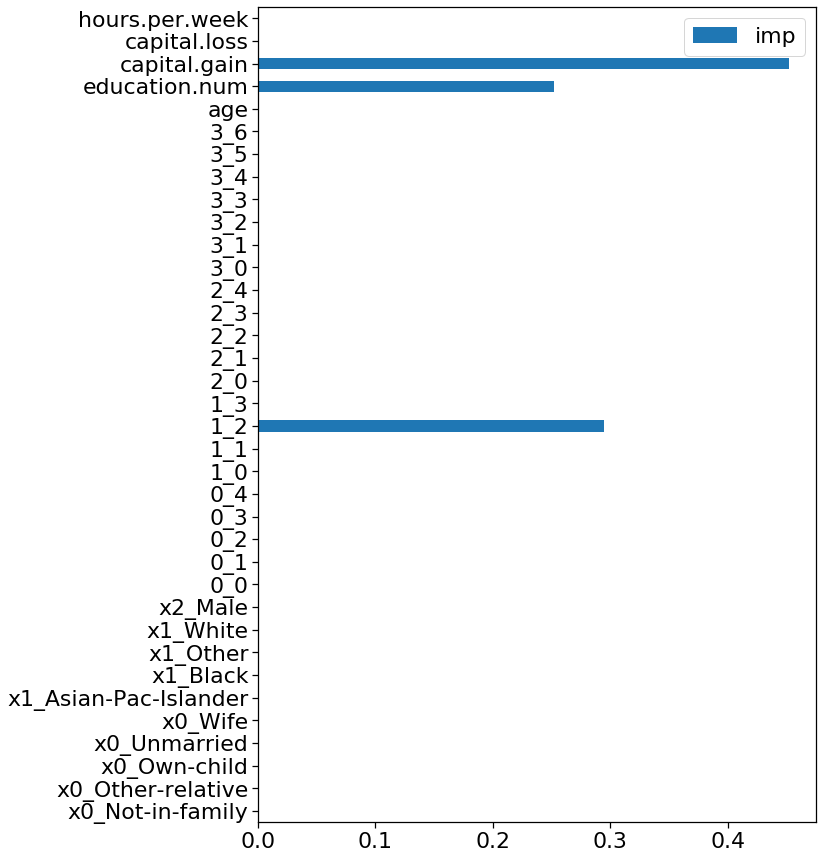

In [218]:
importance_table.plot(kind = 'barh', figsize = (10,15));

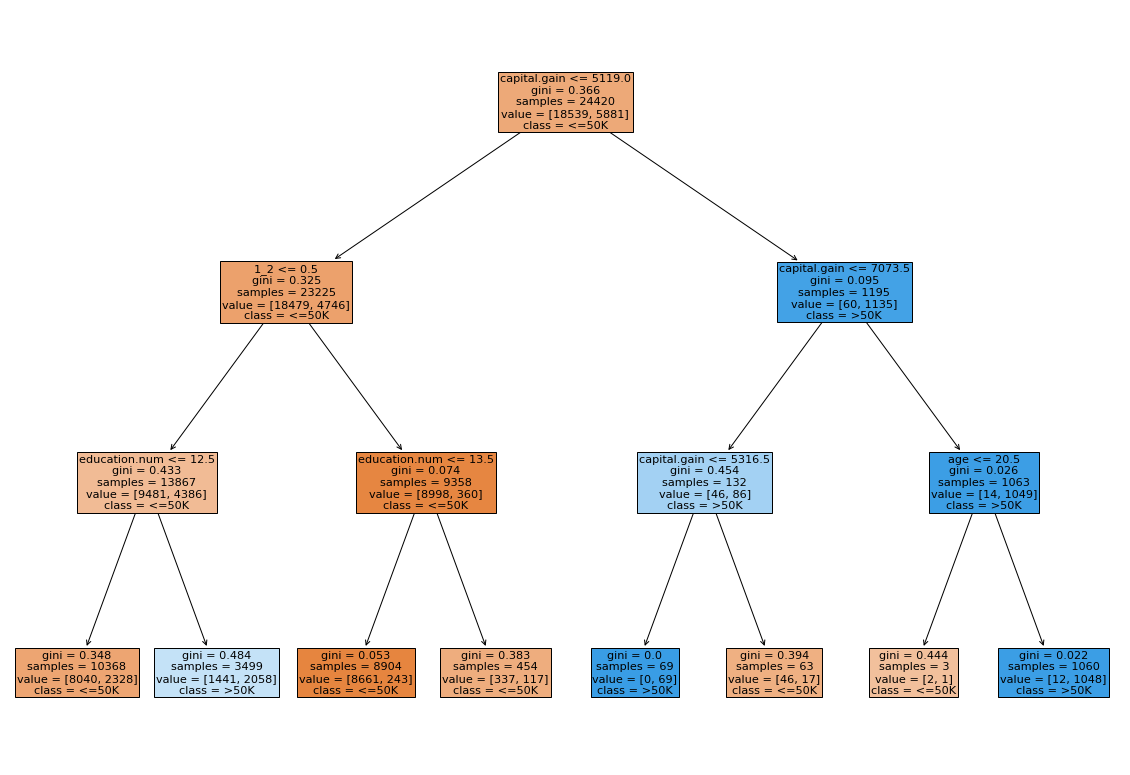

In [219]:
plt.figure(figsize=(20,14))
plot_tree(model, feature_names=features, filled=True, class_names=['<=50K', '>50K'])
plt.show()

# Feature Selection
>## Table of Contents

1. data transform
1. feature selection : slect percentile
1. model fitting and evaluation : logistic regression

we will continue the analysis in the illustration before with adding feature selection in the process.

In [223]:
from sklearn.feature_selection import SelectPercentile, f_classif

>## Data Transformation

In [221]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


>## Feature Selection Process

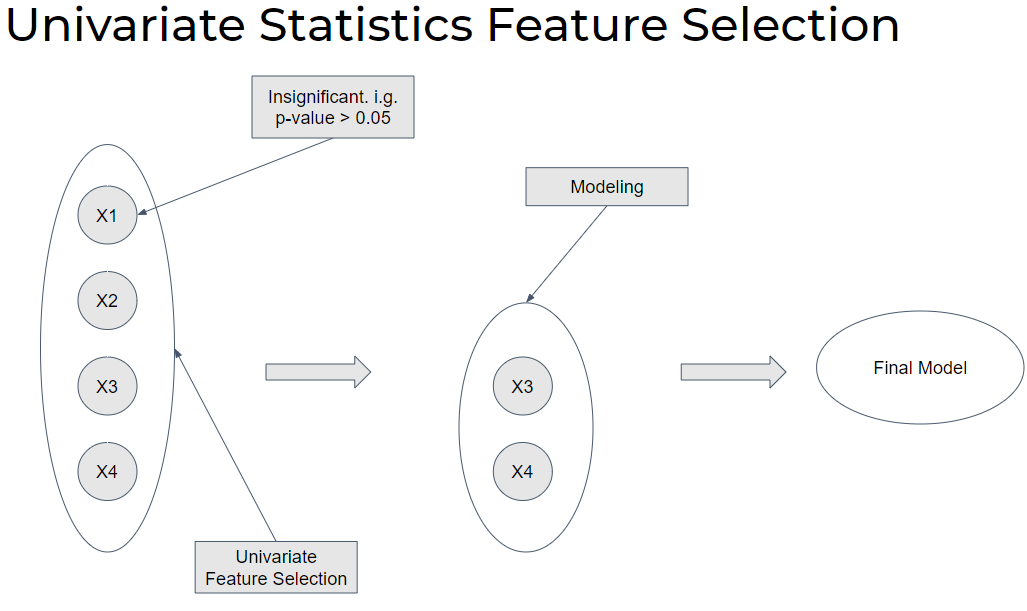

In [224]:
select = SelectPercentile(percentile = 50)
select.fit(X_train_preprocessed, y_train)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10 15 19 24] are constant.
  UserWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=50,
                 score_func=<function f_classif at 0x000001FD4E301678>)

In [227]:
X_train_preprocessed_selected = select.transform(X_train_preprocessed)
X_test_preprocessed_selected = select.transform(X_test_preprocessed)

In [228]:
print('before selection',X_train_preprocessed.shape)
print('after selection',X_train_preprocessed_selected.shape)

before selection (24420, 36)
after selection (24420, 18)


In [229]:
X_train_preprocessed_selected[:5]

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 6.300e+01, 9.000e+00, 0.000e+00, 0.000e+00, 4.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 4.700e+01, 1.300e+01, 0.000e+00, 0.000e+00, 4.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 9.000e+01, 4.000e+00, 0.000e+00, 0.000e+00, 4.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 6.400e+01, 9.000e+00, 7.298e+03, 0.000e+00, 4.500e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.00

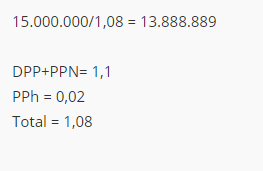

In [207]:
net = 200000000
net = 169500000

dpp_ppn = 1
pph = 0.02
total_tax = dpp_ppn - pph

gross = net/total_tax

total_tax, gross

(0.98, 172959183.6734694)

In [208]:
final_amount = gross - (gross*2/100)
final_amount

169500000.0